# 影像運算

## 位元平面分解
將灰階影像中處於同一平面上的二進位像素進行組合，獲得一幅二進制值影像，該影像被稱為灰階影像的位元平面，這個過程稱為"位元平面分解"。

以下範例是使用灰階圖，對這張圖做"位元平面方解"，分解後會得到8張位元圖。

In [1]:
import cv2
import numpy as np
lena = cv2.imread("sample/lena.tiff", 0)
cv2.imshow("sample/lena", lena)
r, c = lena.shape
# x 為r*c*8 的 0矩陣
x = np.zeros((r, c, 8), dtype=np.uint8)
for i in range(8):
    x[:,:,i] = 2**i
r = np.zeros((r, c, 8), dtype=np.uint8)
for i in range(8):
    r[:,:,i] = cv2.bitwise_and(lena, x[:,:,i]) #and邏輯閘
    mask = r[:,:,i] > 0
    r[mask] = 255
    cv2.imshow(str(i), r[:,:,i])
cv2.waitKey()
cv2.destroyAllWindows()

## 影像加密、解密
透過 邏輯閘、二進位 運算就可以實現影像加密、解密。
加密：原始影像 與 金鑰影像進行逐位元互斥，可實現加密。
解密：將加密後的影像與金鑰影像再次進行逐位元互斥，可實現解密。

In [2]:
a = np.array([198,10,20,30])
b = np.array([219,2,2,2])

In [3]:
cv2.bitwise_and(a, b)

array([[194],
       [  2],
       [  0],
       [  2]], dtype=int32)

In [4]:
import cv2
import numpy as np
lena = cv2.imread("sample/lena.tiff", 0)
r, c = lena.shape
key = np.random.randint(0, 256, size=[r,c], dtype=np.uint8)
encryption = cv2.bitwise_xor(lena, key)
decryption = cv2.bitwise_xor(encryption, key)
cv2.imshow("lena", lena)
cv2.imshow("key",key)
cv2.imshow("encryption", encryption)
cv2.imshow("decryption", decryption)
cv2.waitKey()
cv2.destroyAllWindows()

## 數字浮水印
最低有效位(Least Singification Bit, LSB)指的是一個二進位數字中的第0位(即最低位)。

LSB資訊隱藏指的是，將一個需要隱藏的二值影像資訊遷入載體影像的LSB(也就是將載體影像的LSB替換成需要隱藏的二值影像)。

如此可以將二值影像隱藏起來。

由於二值影像處於載體影像上的LSB，所以對影像的影像非常不明顯，具有隱密性。
有必要時直接將載體影像的LSB分析出來，即可獲得嵌入在該位上的二值影像，達到分析秘密資訊的目的。

這種資訊隱藏方式也被叫做「數位浮水印」，透過該方式可以實現資訊隱藏、版權認證、身分認證。

In [121]:
import cv2
import numpy as np
# 讀取原始載體影像
lena = cv2.imread("sample/lena.tiff", 0)
# 讀取浮水印影像
watermark = cv2.imread("sample/watermark.tiff", 0)
# 將浮水印影像內的值255處理為1，以方便嵌入
# 後續章節會介紹使用threshold處理
w = watermark[:,:] > 0 #邏輯判斷 True / False
watermark[w] = 1
# 讀取原始載體影像的 shape值
r, c = lena.shape
#==============嵌入過程==============
# 產生元素值都是254的陣列
t254 = np.ones((r,c), dtype=np.uint8)*254
# 取得lena影像的高七位(除了LSB最低有效位之外)
lenaH7 = cv2.bitwise_and(lenaH7, t254)
# 將watermark嵌入lenaH7內
e = cv2.bitwise_or(lena7, watermark)
#==============分析過程==============
# 產生都是1的陣列
t1 = np.ones((r,c),dtype=np.uint8)
# 從載體影像內分析浮水影像
wm = cv2.bitwise_and(e, t1)
print(wm)
# 將浮水印影像內的值1處理為255，以方便顯示
# 後續章節會介紹使用threshold實現
w = wm[:,:] > 0
wm[w] = 255
#==============顯示==================
cv2.imshow("lena", lena)
cv2.imshow("watermark", watermark*255)
cv2.imshow("e", e)
cv2.imshow("wm", wm)
cv2.waitKey()
cv2.destroyAllWindows()

TypeError: 'NoneType' object is not subscriptable

# 色彩空間轉換
RGB、GRAY、YCrCb、HSV、HLS、CIE XYZ、CIE L*a*b、CIE L*u*v、Bayer

cv2.cvtColor(src, code [, dstCn])

其中:

dst : 輸出影像，與原始輸入影像具有同樣的資料型態和深度。

src : 原始輸入影像

code : 色彩空間轉換碼

dstCn : 靶心圖表面的通道數。如果參數為預設的0，則通道數自動透過src或code獲得。

## cv2.cvtColor

In [6]:
# BGR轉 灰階
import cv2
import numpy as np
img = np.random.randint(0,256,size=[2,4,3],dtype=np.uint8) # 隨機產生一張圖
rst = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 對圖片做色彩轉換
print("img=\n", img)
print("rst=\n", rst)
print("像素點(1,0)直接計算獲得的值=",img[1,0,0]*0.114+img[1,0,1]*0.587+img[1,0,2]*0.299)
print("像速點(1,0)使用公式cv2.cvtColor()轉換值=",rst[1,0])

img=
 [[[116  95  17]
  [204  51 141]
  [138 188 145]
  [102 163  34]]

 [[ 93  62 152]
  [215  62 122]
  [ 12 118 177]
  [ 83 208 105]]]
rst=
 [[ 74  95 169 117]
 [ 92  97 124 163]]
像素點(1,0)直接計算獲得的值= 92.44399999999999
像速點(1,0)使用公式cv2.cvtColor()轉換值= 92


In [9]:
# 灰階轉BGR
import cv2
import numpy as np
img = np.random.randint(0,256,size=[2,4],dtype=np.uint8)
rst=cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
print("img=\n", img)
print("rst=\n", rst)

img=
 [[133 147   6 153]
 [164 117 134  14]]
rst=
 [[[133 133 133]
  [147 147 147]
  [  6   6   6]
  [153 153 153]]

 [[164 164 164]
  [117 117 117]
  [134 134 134]
  [ 14  14  14]]]


## 標記指定顏色

### cv2.inRange()
cv2.inRange(src, lowerb, upperb)

其中:

dst：輸出結果，大小和src一致

src：要檢查的陣列or影像

lowerb：範圍下界

upperb：範圍上界

如果src值  在指定範圍內，則dst中對應位置上的值為255

如果src值不在指定範圍內，則dst中對應位置上的值為0

In [13]:
import cv2
import numpy as np
img = np.random.randint(0,256,size=[5,5],dtype=np.uint8)
min_ = 100
max_ = 200
mask = cv2.inRange(img, min_, max_)
print("img=\n", img)
print("mask=\n", mask)

img=
 [[146 227 111 191 133]
 [130 222  68 227  10]
 [240  93   3  28  65]
 [ 96 200 105 200 212]
 [162 171 236 234  39]]
mask=
 [[255   0 255 255 255]
 [255   0   0   0   0]
 [  0   0   0   0   0]
 [  0 255 255 255   0]
 [255 255   0   0   0]]


### cv2.bitwise_and 使用mask 顯示ROI(有興趣區域)

In [17]:
import cv2
import numpy as np
# 圖片
img = np.ones([5,5],dtype=np.uint8)*9
# mask
mask = np.zeros([5,5],dtype=np.uint8)
mask[0:3,  0] = 1
mask[2:5,2:4] = 1
# ROI
roi = cv2.bitwise_and(img, img, mask=mask)
print("img=\n",img)
print("mask=\n",mask)
print("roi=\n",roi)

img=
 [[9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]]
mask=
 [[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 1 1 0]
 [0 0 1 1 0]
 [0 0 1 1 0]]
roi=
 [[9 0 0 0 0]
 [9 0 0 0 0]
 [9 0 9 9 0]
 [0 0 9 9 0]
 [0 0 9 9 0]]


### 顯示特定顏色值

In [16]:
import cv2
import numpy as np
lena = cv2.imread("sample/lena.tiff")
hsv_lena = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)
cv2.imshow("lena", hsv_lena)
#======選取顏色範圍=======
min_ = np.array([10,50,50])
max_ = np.array([360,255,255])
# 確定藍色區域
mask = cv2.inRange(hsv_lena, min_, max_)
# 透過cv2.bitwise_and 鎖定藍色區域
color_roi = cv2.bitwise_and(hsv_lena, hsv_lena, mask=mask)
cv2.imshow('blue', color_roi)

cv2.waitKey()
cv2.destroyAllWindows()

## RGBA的alpha通道
在RGB色彩空間三種通道的基礎上，還可以加上一個A通道，也叫alpha通道，表示透明度。

這4種通道的顏色空間被稱為RBGA，PNG影像是一種典型的4通道影像。

alpha通道的設定範圍是[0,1]或[0,255]，表示透明到不透明。

In [20]:
import cv2
import numpy as np
img = np.random.randint(0,256,size=[2,3,3],dtype=np.uint8)
bgra = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
print("img=\n" , img)
print("bgra=\n",bgra)
b,g,r,a = cv2.split(bgra)
print("a=\n",a)
a[:,:] = 125
bgra = cv2.merge([b,g,r,a])
print("bgra=\n",bgra)

img=
 [[[250  73   6]
  [ 57 189 112]
  [173 227  23]]

 [[130 225 146]
  [ 82 202 137]
  [ 31 246 216]]]
bgra=
 [[[250  73   6 255]
  [ 57 189 112 255]
  [173 227  23 255]]

 [[130 225 146 255]
  [ 82 202 137 255]
  [ 31 246 216 255]]]
a=
 [[255 255 255]
 [255 255 255]]
bgra=
 [[[250  73   6 125]
  [ 57 189 112 125]
  [173 227  23 125]]

 [[130 225 146 125]
  [ 82 202 137 125]
  [ 31 246 216 125]]]


# 幾何轉換

## 縮放cv2.resize()
dst = cv2.resize(src, dsize[, fx[, fy[, interpolation]]])

其中：

dst：輸出影像

src：輸入影像

dsize：輸出影像大小

fx：水平方向的縮放比例

fy：垂直方向的縮放比例

interpolation：插值方式

In [25]:
import cv2
img =cv2.imread("sample/lena.tiff")
rows, cols = img.shape[:2] # 0,1
size = (int(cols*0.9), int(rows*0.5))
rst = cv2.resize(img, size)
print("img.shape=",img.shape)
print("rst.shape=",rst.shape)

img.shape= (512, 512, 3)
rst.shape= (256, 460, 3)


## 翻轉cv2.flip()
dst = cv2.flip(src, flipCode)

其中：

dst：輸出影像array

src：要處理的原始影像

flipCode：旋轉類型(0:繞著x軸翻轉。1、2、3：繞著y軸翻轉。-1,-2,-3：繞著x,y軸同時翻轉)。

In [1]:
import cv2
img = cv2.imread("sample/lena.tiff")
x = cv2.flip(img, 0)
y = cv2.flip(img, 1)
xy = cv2.flip(img, -1)
cv2.imshow("img", img)
cv2.imshow("x", x)
cv2.imshow("y", y)
cv2.imshow("xy", xy)
cv2.waitKey()
cv2.destroyAllWindows()

## 仿射cv2.warpAffine()
仿射轉換：影像可以透過一系列的幾何轉換來實現平移、旋轉、等多種操作。讓轉換保持影像的平直性、平行性。(平直、平行性:經轉換後，直線還是直線、平行線也還是平行線)

dst = cv2.warpAffine(src, M, dsize[, flags[, borderMode[, borderValue]]])

src:原始影像

M:2*3的轉換矩陣。使用不同的M，可以實現不同的仿射轉換。

dsize:輸出影像的實際大小

flags:內插方法，預設是INTER_LINEAR。當該值為WARP_INVERSE_MAP時，表示M是逆轉換類型。

borderMode:邊類型，預設為BORDER_CONSTANT。當該值為BORDER_TRANSPARENT時，表示靶心圖表面內的值不做改變，這些值對應原始影像內的例外值。

borderValue代表邊界值，預設為0。

### 平移 (M)

In [2]:
import cv2
import numpy as np
img = cv2.imread("sample/lena.tiff")
height, width = img.shape[:2]
x = 100
y = 200
M = np.float32([[1, 0, x], [0, 1, y]])
move = cv2.warpAffine(img, M, (width, height))
cv2.imshow("original", img)
cv2.imshow("move", move)
cv2.waitKey()
cv2.destroyAllWindows()

### 旋轉 M=cv2.getRotationMatrix2D()
M = cv2.getRotationMatrix2D(center ,angle, scale)

其中:

M:轉換矩陣

center:旋轉的中心點

angle:旋轉角度(正數:逆時鐘，負數:順時鐘)。

scale:轉換尺度(縮放大小)。

In [4]:
# 範例:旋轉45度，縮小0.6倍
import cv2
img = cv2.imread("sample/lena.tiff")
# 建立 M轉換矩陣
height, weight = img.shape[:2]
M = cv2.getRotationMatrix2D((height/2, width/2), 45, 0.6)
# 旋轉
rotate = cv2.warpAffine(img, M, (height, width))

cv2.imshow("original", img)
cv2.imshow("move", rotate)
cv2.waitKey()
cv2.destroyAllWindows()

### 更複雜的仿射轉換－變形M = cv2.getAffineTransform()
M = cv2.getAffineTransform(src, dst)

其中:

src:輸入影像的三個點座標

dst:輸出影像的三個點座標

三個點分別對應平行四邊形的 左上、右上、左下角。

In [5]:
import cv2
import numpy as np
img = cv2.imread("sample/lena.tiff")
rows, cols, ch = img.shape
p1 = np.float32([[0,0],[cols-1,0],[0,rows-1]])
p2 = np.float32([[0,rows*0.33],[cols*0.85,rows*0.25],[cols*0.15,rows*0.7]])
M = cv2.getAffineTransform(p1, p2)
dst = cv2.warpAffine(img, M, (cols,rows))

cv2.imshow("original", img)
cv2.imshow("result", dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 透視cv2.warpPerspective()
dst = cv2.warpPerspective(src, M, dsize[, flags[, borderMode[, bordervalue])

dst:經透視處理後的影像

src:要透視的影像

M:代表3*3轉換矩陣

dsize:輸出影像的實際大小

flags:內插方法，預設是INTER_LINEAR。當該值為WARP_INVERSE_MAP時，表示M是逆轉換類型。

borderMode:邊類型，預設為BORDER_CONSTANT。當該值為BORDER_TRANSPARENT時，表示靶心圖表面內的值不做改變，這些值對應原始影像內的例外值。

borderValue代表邊界值，預設為0。

In [8]:
import cv2
import numpy as np
img = cv2.imread("sample/lena.tiff")
rows,cols = img.shape[:2]
print(rows, cols)
'''
pts1 = np.float32([[150,50],[400,50],[60,450],[310,450]])
pts2 = np.float32([[50,50],[rows-50,50],[50,cols-50],[rows-50,cols-50]])
'''
pts1 = np.float32([[0,0],[0,cols],[rows,0],[rows,cols]])
pts2 = np.float32([[0,0],[0,cols],[rows,0],[rows-50,cols-50]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img, M, (cols, rows))

cv2.imshow("img", img)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

512 512


## 重對映 cv2.remap()

### 多重對映 cv2.remap()
dst = cv2.trmap(src, map1 ,map2, interpolation[borderMode[, borderValue]])

dst:輸出，與src有相同的大小、類型。

src:原始影像

map1:參數有兩種可能的值。
    * 表示(x,y)點的對映。
    * 表示CV_16SC2, CV_32FC1, CV_32FC2類型的(x,y)點的x值。

map2:參數同樣有兩種可能的值:
    * 當map1表示(x,y)時，該值為空。
    * 當map1表示(x,y)點的x值時，該值是CV_16UC1, CV_32FC1類型(x,y)點的y值。
    
interpolation:插值方式。不支援INTER_AREA

borderMode:邊類型，預設為BORDER_CONSTANT。當該值為BORDER_TRANSPARENT時，表示靶心圖表面內的值不做改變，這些值對應原始影像內的例外值。

borderValue代表邊界值，預設為0。

In [22]:
# 將目標陣列內的值全部 映射成 原始影像內第0行、第3列的像素值
import cv2
import numpy as np
img = np.random.randint(0,256,size=[4,5],dtype=np.uint8)
rows, cols = img.shape

mapx = np.ones(img.shape, np.float32)*0
mapy = np.ones(img.shape, np.float32)*3
rst = cv2.remap(img, mapy, mapx, cv2.INTER_LINEAR)

print("img=\n", img)
print("mapx=\n", mapx)
print("mapy=\n", mapy)
print("rst=\n", rst)

img=
 [[149 250 106 146 229]
 [ 98  53 159  97  17]
 [ 63  48 131 234 228]
 [215  12  87 115 147]]
mapx=
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
mapy=
 [[3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3.]]
rst=
 [[146 146 146 146 146]
 [146 146 146 146 146]
 [146 146 146 146 146]
 [146 146 146 146 146]]


### 複製 cv2.remap()
dst = cv2.trmap(src, map1 ,map2, interpolation[borderMode[, borderValue]])

    map1:對應位置上的x軸訊息。
    map2:對應位置上的y軸訊息。

In [20]:
import cv2
import numpy as np
img = np.random.randint(0,256,size=[4,5],dtype=np.uint8)
rows,cols = img.shape
mapx = np.zeros(img.shape, np.float32)
mapy = np.zeros(img.shape, np.float32)
for i in range(rows):
    for j in range(cols):
        mapx.itemset((i,j), i)
        mapy.itemset((i,j), j)
rst = cv2.remap(img, mapy, mapx, cv2.INTER_LINEAR)

print("img=\n", img)
print("mapx=\n", mapx)
print("mapy=\n", mapy)
print("rst=\n", rst)

img=
 [[219 100   8 228 119]
 [115  81 146 153 198]
 [158 127 251  73  62]
 [107 244   9  93  48]]
mapx=
 [[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]]
mapy=
 [[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]
rst=
 [[219 100   8 228 119]
 [115  81 146 153 198]
 [158 127 251  73  62]
 [107 244   9  93  48]]


In [24]:
import cv2
import numpy as np
img = cv2.imread("sample/lena.tiff")
rows,cols = img.shape[:2]
mapx = np.zeros(img.shape[:2], np.float32)
mapy = np.zeros(img.shape[:2], np.float32)
for i in range(rows):
    for j in range(cols):
        mapx.itemset((i,j), i)
        mapy.itemset((i,j), j)
rst = cv2.remap(img, mapy, mapx, cv2.INTER_LINEAR)
cv2.imshow("img", img)
cv2.imshow("rst", rst)
cv2.waitKey()
cv2.destroyAllWindows()

### 繞x軸翻轉 cv2.remap()
 如果要用cv2.remap()來做x軸翻轉，必須:
     x座標軸的值保持不變             ->map1的值保持不變
     y座標軸的值以x軸為對稱軸進行交換 ->map2的值調整為「總行數-1-目前行數」

In [46]:
import cv2
import numpy as np
img = np.random.randint(0,256,size=[4,5],dtype=np.uint8)
rows,cols = img.shape
mapx = np.zeros(img.shape, np.float32)
mapy = np.zeros(img.shape, np.float32)
for i in range(rows):
    for j in range(cols):
        mapx.itemset((i,j), rows-1-i)
        mapy.itemset((i,j), j)
rst = cv2.remap(img, mapy, mapx, cv2.INTER_LINEAR)

print("img=\n", img)
print("mapx=\n", mapx)
print("mapy=\n", mapy)
print("rst=\n", rst)

img=
 [[128  10 229  86 192]
 [ 97  27  43 142 246]
 [146 179 169  29 106]
 [235 217 247 141  88]]
mapx=
 [[3. 3. 3. 3. 3.]
 [2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]
mapy=
 [[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]
rst=
 [[235 217 247 141  88]
 [146 179 169  29 106]
 [ 97  27  43 142 246]
 [128  10 229  86 192]]


### 繞y軸翻轉 cv2.remap()

In [48]:
import cv2
import numpy as np
img = np.random.randint(0,256,size=[4,5],dtype=np.uint8)
rows,cols = img.shape
mapx = np.zeros(img.shape, np.float32)
mapy = np.zeros(img.shape, np.float32)
for i in range(rows):
    for j in range(cols):
        mapx.itemset((i,j), i)
        mapy.itemset((i,j), cols-1-j)
rst = cv2.remap(img, mapy, mapx, cv2.INTER_LINEAR)

print("img=\n", img)
print("mapx=\n", mapx)
print("mapy=\n", mapy)
print("rst=\n", rst)

img=
 [[ 47 196 208 151 164]
 [ 57 167 244 162  11]
 [109  65  15 251 140]
 [249  95 191 203  85]]
mapx=
 [[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]]
mapy=
 [[4. 3. 2. 1. 0.]
 [4. 3. 2. 1. 0.]
 [4. 3. 2. 1. 0.]
 [4. 3. 2. 1. 0.]]
rst=
 [[164 151 208 196  47]
 [ 11 162 244 167  57]
 [140 251  15  65 109]
 [ 85 203 191  95 249]]


### x、y方向互換 cv2.remap()

In [58]:
import cv2
import numpy as np
img = cv2.imread("sample/lena.tiff")
x, y = img.shape[:2]
mapx = np.zeros(img.shape[:2], np.float32)
mapy = np.zeros(img.shape[:2], np.float32)
for i in range(x):
    for j in range(y):
        mapy.itemset((i,j), i)
        mapx.itemset((i,j), j)
rst = cv2.remap(img, mapy ,mapx ,cv2.INTER_LINEAR)
cv2.imshow("img", img)
cv2.imshow("rst", rst)
cv2.waitKey()
cv2.destroyAllWindows()

In [56]:
mapx

array([[  0.,   1.,   2., ..., 509., 510., 511.],
       [  0.,   1.,   2., ..., 509., 510., 511.],
       [  0.,   1.,   2., ..., 509., 510., 511.],
       ...,
       [  0.,   1.,   2., ..., 509., 510., 511.],
       [  0.,   1.,   2., ..., 509., 510., 511.],
       [  0.,   1.,   2., ..., 509., 510., 511.]], dtype=float32)

In [57]:
mapy

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   1.,   1., ...,   1.,   1.,   1.],
       [  2.,   2.,   2., ...,   2.,   2.,   2.],
       ...,
       [509., 509., 509., ..., 509., 509., 509.],
       [510., 510., 510., ..., 510., 510., 510.],
       [511., 511., 511., ..., 511., 511., 511.]], dtype=float32)

### 影像縮放 cv2.remap()

In [63]:
import cv2
import numpy as np
img = cv2.imread("sample/lena.tiff")
x, y = img.shape[:2]
mapx = np.zeros(img.shape[:2], np.float32)
mapy = np.zeros(img.shape[:2], np.float32)
for i in range(x):
    for j in range(y):
        if (0.25*y< i <0.75*y) and (0.25*x< j <0.75*x):
            mapx.itemset((i,j),2*(j-y*0.25)+0.5)
            mapy.itemset((i,j),2*(i-x*0.25)+0.5)
        else:
            mapx.itemset((i,j),0)
            mapy.itemset((i,j),0)
rst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)

cv2.imshow("img", img)
cv2.imshow("rst", rst)
cv2.waitKey()
cv2.destroyAllWindows()

# 設定值處理
刪除影像內 像素值 高/低於一定值得像素點。

## threshold函數
cv2.threshold()函數進行設定值化處理

retval = cv2.threshold(src, thresh, maxval, type)

retval:傳回的設定值

dst:設定值分割影像的結果(輸出)，與原始影像具有相同的大小、類型。

src:要進行設定值分割的影像，可以是多通道的，8位or32位元浮點數。

thresh:要設定的設定值。

maxval:當type參數維THRESH_BINARY或THRESH_BINARY_INV類型時，需要設定的最大值。

type:設定值分割的類型。

### cv2.THRESH_BINARY 二值化

In [66]:
import cv2
import numpy as np
img = np.random.randint(0,256,size=[4,5],dtype=np.uint8)
t, rst = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
print("img=\n,",img)
print("t=",t)
print("rst=\n",rst)

img=
, [[ 32  54  80 189  34]
 [159 231 229  76 152]
 [207 146  59 146  47]
 [ 34 181 134 153 158]]
t= 127.0
rst=
 [[  0   0   0 255   0]
 [255 255 255   0 255]
 [255 255   0 255   0]
 [  0 255 255 255 255]]


In [70]:
import cv2
import numpy as np
img = cv2.imread("sample/lena.tiff",0) # 0表示灰階
t, rst = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
cv2.imshow("img", img)
cv2.imshow("rst", rst)
cv2.waitKey()
cv2.destroyAllWindows()

### cv2.THRESH_BINARY_INV 反二值化

In [71]:
import cv2
import numpy as np
img = cv2.imread("sample/lena.tiff",0) # 0表示灰階
t, rst = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
cv2.imshow("img", img)
cv2.imshow("rst", rst)
cv2.waitKey()
cv2.destroyAllWindows()

### cv2.THRESH_TRUNC 截斷

In [73]:
import cv2
import numpy as np
img = np.random.randint(0,256,size=[4,5],dtype=np.uint8)
t, rst = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
print("img=\n,",img)
print("t=",t)
print("rst=\n",rst)

img=
, [[246 178 146  14 238]
 [105  80  23  54 119]
 [ 17 102 155 152 175]
 [240  75 172 145  58]]
t= 127.0
rst=
 [[127 127 127  14 127]
 [105  80  23  54 119]
 [ 17 102 127 127 127]
 [127  75 127 127  58]]


In [75]:
import cv2
import numpy as np
img = cv2.imread("sample/lena.tiff",0) # 0表示灰階
t, rst = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
cv2.imshow("img", img)
cv2.imshow("rst", rst)
cv2.waitKey()
cv2.destroyAllWindows()

### cv2.THRESH_TOZERO_INV
    強度值超過 設定值 為0
    小於等於則保持不變。

In [76]:
import cv2
import numpy as np
img = np.random.randint(0,256,size=[4,5],dtype=np.uint8)
t, rst = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
print("img=\n,",img)
print("t=",t)
print("rst=\n",rst)

img=
, [[192  70 230 226  70]
 [121 253  23 100 135]
 [ 25 209  33 201 223]
 [ 25  31 223 148 239]]
t= 127.0
rst=
 [[  0  70   0   0  70]
 [121   0  23 100   0]
 [ 25   0  33   0   0]
 [ 25  31   0   0   0]]


In [77]:
import cv2
import numpy as np
img = cv2.imread("sample/lena.tiff",0) # 0表示灰階
t, rst = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
cv2.imshow("img", img)
cv2.imshow("rst", rst)
cv2.waitKey()
cv2.destroyAllWindows()

### cv2.THRESH_TOZERO
強度值 低於 設定值 皆為0。

In [78]:
import cv2
import numpy as np
img = np.random.randint(0,256,size=[4,5],dtype=np.uint8)
t, rst = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
print("img=\n,",img)
print("t=",t)
print("rst=\n",rst)

img=
, [[186  93  70 231 128]
 [129  32  18 127 140]
 [225   3 152 163 158]
 [246  22 102 194  95]]
t= 127.0
rst=
 [[186   0   0 231 128]
 [129   0   0   0 140]
 [225   0 152 163 158]
 [246   0   0 194   0]]


In [79]:
import cv2
import numpy as np
img = cv2.imread("sample/lena.tiff",0) # 0表示灰階
t, rst = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
cv2.imshow("img", img)
cv2.imshow("rst", rst)
cv2.waitKey()
cv2.destroyAllWindows()

## cv2.adaptiveThreshold()
dst = cv.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)

src:要進行處理的原始影像。必須是8bit單通道影像。

maxValue:最大值

adaptiveMethod:調整方式。
    cv2.ADAPTIVE_THRESH_MEAN_C
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C
    
thresholdType:設定值處理方式。 cv2.THRESH_BINARY或cv2.THRESH_BINARY_INV

blockSize:kernel大小，鄰域尺寸，通常3、5、7。

C:常數

In [86]:
import cv2
import numpy as np
img = cv2.imread("sample/lena.tiff",0) # 0表示灰階
t1, thd = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
athdMEAN = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 3)
athdGAUS = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 3)
cv2.imshow("img", img)
cv2.imshow("thd", thd)
cv2.imshow("athdMEAN", athdMEAN)
cv2.imshow("athdGAUS", athdGAUS)
cv2.waitKey()
cv2.destroyAllWindows()

## Otsu處理
在OpecCV中，透過在函數cv2.threshold()中對參數type的類型多傳遞一個參數cv2.THRESH_OTSU，即可實現Otsu將閥值分割。

t, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

其中:
1. 參數type增加一個參數值 cv2.THRESH_OTSU
2. 設定值為0。在使用OTSU時，設定值要設0，cv2.threshold()最自動找最佳設定值。
3. 傳回值t是Otsu方法計算獲得並使用的最佳設定值。

如果沒有使用Otsu，情況如下

t,thd = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)，其中 t = 127

In [84]:
import cv2
import numpy as np
img = np.zeros((5,5),dtype=np.uint8)
img[0:6,0:6] = 123
img[2:6,2:6] = 126
print("img=\n", img)

# 無Otsu
t1,thd = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
print("thd=\n", thd)
print("t1=\n", t1)

# 有Otsu
t2, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("otsu=\n", otsu)
print("t2=\n", t2)

img=
 [[123 123 123 123 123]
 [123 123 123 123 123]
 [123 123 126 126 126]
 [123 123 126 126 126]
 [123 123 126 126 126]]
thd=
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
t1=
 127.0
otsu=
 [[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0 255 255 255]
 [  0   0 255 255 255]
 [  0   0 255 255 255]]
t2=
 123.0


In [85]:
import cv2
import numpy as np
img = cv2.imread("sample/lena.tiff", 0)
t1, thd  = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
t2, otsu = cv2.threshold(img,   0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow("img", img)
cv2.imshow("thd", thd)
cv2.imshow("otsu", otsu)
cv2.waitKey()
cv2.destroyAllWindows()

# 影像平滑處理Smoothing Images

在盡量保留影像原有訊息的情況下，過濾掉影像內部的雜訊。

平滑化處理通常伴隨影像模糊操作，因此也可稱做影像模糊處理(Blurring Images)。

## 均值濾波average_filter
dst = cv2.blur(src, ksize, anchor, borderType)

dst:經均值濾波後的結果。

src:原始影像。

ksize:濾波核大小。

anchor:slinding windows的中心位置座標。

borderType:邊界模式

In [88]:
import cv2
lena_noise = cv2.imread("sample/lena_noise.jpg")
lena_noise_blur = cv2.blur(lena_noise, (5,5))
cv2.imshow("lena_noise", lena_noise)
cv2.imshow("result", lena_noise_blur)
cv2.waitKey()
cv2.destroyAllWindows()

## 方框濾波
dst = cv2.boxFilter(src, ddepth, ksize, anchor, normalize, borderType)

dst:輸出

src:原始影像

ddepth:處理影像的影像深度，一般使用-1表示與原始影像使用相同的影像深度。

ksize:濾波核大小。

anchor:濾波核中心位置。

normalize:在濾波時是否進行歸一化。
    1:  使用歸一化處理，要用鄰域像素值和除以面積。
    0:不使用歸一化處理，直接使用鄰域像素值的和。

In [93]:
# 使用normalize=0(不使用歸一化)，所以計算的是kernel(3*3、5*5)像素值之和，所以值都會超過255，顯示為白色。
import cv2
import numpy as np
lena_noise = cv2.imread("sample/lena_noise.jpg")
lena_noise_boxfilter = cv2.boxFilter(lena_noise, -1, (5,5), normalize=0)
cv2.imshow("lena_noise", lena_noise)
cv2.imshow("lena_noise_boxfilter", lena_noise_boxfilter)
cv2.waitKey()
cv2.destroyAllWindows()

In [94]:
# 使用normalize=1(不使用歸一化)
import cv2
import numpy as np
lena_noise = cv2.imread("sample/lena_noise.jpg")
lena_noise_boxfilter = cv2.boxFilter(lena_noise, -1, (5,5), normalize=1)
cv2.imshow("lena_noise", lena_noise)
cv2.imshow("lena_noise_boxfilter", lena_noise_boxfilter)
cv2.waitKey()
cv2.destroyAllWindows()

## 高斯濾波 gaussian_filter
dst = cv2.GaussianBlur(src, ksize, sigmaX, sigmaY, borderType)

dst:輸出

src:輸入

ksize:濾波核大小

sigmaX:旋積核在水平方向上(X軸方向)的標準差，其控制的是加權比例。

sigmaY:旋積核在水平方向上(X軸方向)的標準差。如果該值設為0，則只採用sigmaX的值;如果sigmaX、sigmaY都是0，則透過ksize.width、ksize.height計算獲得。
    sigmaX = 0.3[(ksize.width -1)*0.5-1]+0.8
    sigmaY = 0.3[(ksize.height-1)*0.5-1]+0.8
    
borderType:邊界模式。

通常:
    dst = cv2.GaussianBlur(src, ksize, 0, 0)

In [95]:
import cv2
import numpy as np
lena_noise = cv2.imread("sample/lena_noise.jpg")
lena_noise_GaussianBlur = cv2.GaussianBlur(lena_noise, (5,5), 0, 0)
cv2.imshow("lena_noise", lena_noise)
cv2.imshow("lena_noise_GaussianBlur", lena_noise_GaussianBlur)
cv2.waitKey()
cv2.destroyAllWindows()

## 中值濾波 median_filter
因為需要進行排序等操作，中值濾波需要的運算量較大。

dst = cv2.medianBlur(src, ksize)

In [98]:
import cv2
lena_noise = cv2.imread("sample/lena_noise.jpg")
lena_noise_medianBlur = cv2.medianBlur(lena_noise, 5)
cv2.imshow("lena_noise", lena_noise)
cv2.imshow("lena_noise_medianBlur", lena_noise_medianBlur)
cv2.waitKey()
cv2.destroyAllWindows()

## 雙邊濾波
雙邊濾波在計算某一個像素點的新值時，考慮以下兩點:
    1. 距離訊息(距離越遠，加權越小)。
    2. 色彩資訊(色差差別越大，加權越小)。
    
綜合可慮距離、色彩的加權結果，既能夠有效地去除雜訊，又能夠好好地保護邊緣資訊。

dst = cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace, borderType)

dst:輸出

src:輸入

d:濾波時選取的空間距離參數

sigmaColor:濾波處理時選取的顏色差值範圍，該值決定了周圍那些像素點能夠參與到濾波中來。

sigmaSpace:座標空間中的sigma值。

borderType:邊界樣式

In [100]:
import cv2
lena_noise = cv2.imread("sample/lena_noise.jpg")
lena_noise_bilateralFilter = cv2.bilateralFilter(lena_noise, 50,100,100)
cv2.imshow("lena_noise", lena_noise)
cv2.imshow("lena_noise_bilateralFilter", lena_noise_bilateralFilter)
cv2.waitKey()
cv2.destroyAllWindows()

## 高斯、雙邊濾波 比較

In [101]:
import cv2
lena_noise = cv2.imread("sample/lena_noise.jpg")
lena_noise_gaussianBlur = cv2.GaussianBlur(lena_noise, (55,55),0, 0)
lena_noise_bilateralFilter = cv2.bilateralFilter(lena_noise, 55, 100, 100)
cv2.imshow("lena_noise", lena_noise)
cv2.imshow("lena_noise_gaussianBlur", lena_noise_gaussianBlur)
cv2.imshow("lena_noise_bilateralFilter", lena_noise_bilateralFilter)
cv2.waitKey()
cv2.destroyAllWindows()

## 自訂 2D旋積核
旋積核 = kernel*kernel (旋積核=3x3的空間，也就是slinding windows本身)

dst = cv2.filter2D(src, ddepth, kernel, anchor, delta, borderType)

ddepth:一般為-1，表示與原始影像使用相同的影像深度。

delta:是修正值，是可選項。如果該值存在，會在基礎濾波的結果上加上該值做為最後的濾波處理結果。


通常:
    dst = cv2.filter2D(src, ddepth, kernel)

In [103]:
import cv2
import numpy as np
lena_noise = cv2.imread("lena_noise.jpg")
# 製作 旋積核
kernel = np.ones((9,9), np.float32)/81
r = cv2.filter2D(lena_noise, -1, kernel)
cv2.imshow("lena_noise", lena_noise)
cv2.imshow("r", r)
cv2.waitKey()
cv2.destroyAllWindows()

# 形態學操作
形態學 = 數學形態學 = Mathematical Morphology

是影像處理過程中一個非常重要的研究方向。

腐蝕、膨脹、閉運算、開運算、形態學梯度(Morphological Gradient)運算、頂帽運算(禮帽)、黑帽運算。

其中腐蝕、膨脹操作是形態學的基礎，將其結合能夠實現其他運算(開、閉... ...等)。

https://docs.opencv.org/trunk/d9/d61/tutorial_py_morphological_ops.html

## 腐蝕 Erosion
dst = cv2.erode(src, kernel[, anchor[, iterations[, borderType[, borderValue]]]])

kernel:腐蝕操作時所採用的結構類型。可以自訂產生，也可透過函數cv2.getStructuringElement()產生

iterations:腐蝕操作反覆運算次數，該值預設為1，即只進行一次腐蝕操作。

In [110]:
import cv2
import numpy as np
img = np.zeros((5,5), np.uint8)
img[1:4,1:4] = 1
kernel_1 = np.ones((3,1), np.uint8)
kernel_2 = np.ones((1,3), np.uint8)
erosion_1 = cv2.erode(img, kernel_1)
erosion_2 = cv2.erode(img, kernel_2)
print("img=\n",img)
print("kernel_1=\n",kernel_1)
print("erosion_1=\n",erosion_1)
print("=========================")
print("kernel_2=\n",kernel_2)
print("erosion_2=\n",erosion_2)

img=
 [[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]
kernel_1=
 [[1]
 [1]
 [1]]
erosion_1=
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
kernel_2=
 [[1 1 1]]
erosion_2=
 [[0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]


In [119]:
import cv2
import numpy as np
img = cv2.imread("sample/erode.png", cv2.IMREAD_UNCHANGED)
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(img, kernel)
cv2.imshow("img", img)
cv2.imshow("erosion", erosion)
cv2.waitKey()
cv2.destroyAllWindows()

## 膨脹 Dilation

In [112]:
import cv2
import numpy as np
img = np.zeros((5,5), np.uint8)
img[2,1:4] = 1
kernel = np.ones((3,1), np.uint8)
dilation = cv2.dilate(img, kernel)
print("img=\n", img)
print("kernel=\n", kernel)
print("dilation=\n",dilation)

img=
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
kernel=
 [[1]
 [1]
 [1]]
dilation=
 [[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]


In [118]:
# iterations = 1(default)
import cv2
import numpy as np
img = cv2.imread("sample/dilate.png", cv2.IMREAD_UNCHANGED)
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(img, kernel)
cv2.imshow("img", img)
cv2.imshow("dilation", dilation)
cv2.waitKey()
cv2.destroyAllWindows()

In [117]:
# iterations = 9
import cv2
import numpy as np
img = cv2.imread("sample/dilate.png", cv2.IMREAD_UNCHANGED)
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(img, kernel, iterations=9)
cv2.imshow("img", img)
cv2.imshow("dilation", dilation)
cv2.waitKey()
cv2.destroyAllWindows()

## 通用形態學函數
dst = cv2.morphologyEx(src, op, kernel[, anchor[, iterations[, borderType[, borderValue]]]])

dst:輸出

src:輸入

op:操作類型。

    cv2.MORPH_ERODE  腐蝕
    cv2.MORPH_DILATE 膨脹
    cv2.MORPH_OPEN   開運算
    cv2.MORPH_CLOSE  閉運算
    cv2.MORPH_GRADIENT 形態學梯度運算
    cv2.MORPH_TOPHAT 頂帽運算
    cv2.MORPH_BLACKHAT 黑帽運算
    cv2.MORPH_HITMISS 擊中/擊不中

## 開運算 opening
開運算：先將影像腐蝕，再膨脹。

用途：可以用於去噪、計數。

result = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

In [5]:
import cv2
import numpy as np
img1 = cv2.imread("sample/erode.png")
img2 = cv2.imread("sample/opening.png")
kernel = np.ones((50,50), np.uint8)
result1 = cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernel)
result2 = cv2.morphologyEx(img2, cv2.MORPH_OPEN, kernel)
cv2.imshow("img1", img1)
cv2.imshow("result1", result1)
cv2.imshow("img2", img2)
cv2.imshow("result2", result2)
cv2.waitKey()
cv2.destroyAllWindows()

## 閉運算 closing
閉運算：先將影像膨脹，再腐蝕。

用途：關閉前景物體內部的小孔，或去除物體上的小黑點，還可以將不同前景影像進行連接。

result = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

In [15]:
import cv2
import numpy as np
img1 = cv2.imread("sample/closing.png")
img2 = cv2.imread("sample/closing1.png")
kernel1 = np.ones((3,3),np.uint8)
kernel2 = np.ones((10,10),np.uint8)
result1 = cv2.morphologyEx(img1, cv2.MORPH_CLOSE, kernel1, iterations=3)
result2 = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel2, iterations=3)
cv2.imshow("img1", img1)
cv2.imshow("result1", result1)
cv2.imshow("img2", img2)
cv2.imshow("result2", result2)
cv2.waitKey()
cv2.destroyAllWindows()

## 形態學梯度運算 Morphological Gradient
原始影像 -> 膨脹影像 -> 減去腐蝕

用途：該操作可以取得原始影像中前景影像的邊緣。

result = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

In [16]:
import cv2
import numpy as np
img = cv2.imread("sample/erode.png", cv2.IMREAD_UNCHANGED)
kernel = np.ones((5,5), np.uint8)
result = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
cv2.imshow("img", img)
cv2.imshow("result", result)
cv2.waitKey()
cv2.destroyAllWindows()

## Top Hat
原始影像 -> 減去 開運算(腐蝕 -> 膨脹)

用途：取得影像的雜訊資訊，或獲得比原始影像的邊緣更亮的邊緣資訊。

result = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

In [20]:
import cv2
import numpy as np
o1 = cv2.imread("sample/erode.png", cv2.IMREAD_UNCHANGED)
o2 = cv2.imread("sample/lena.tiff", cv2.IMREAD_UNCHANGED)
kernel = np.ones((5,5),np.uint8)
r1 = cv2.morphologyEx(o1, cv2.MORPH_TOPHAT, kernel)
r2 = cv2.morphologyEx(o2, cv2.MORPH_TOPHAT, kernel)
cv2.imshow("img1", o1)
cv2.imshow("result1", r1)
cv2.imshow("img2", o2)
cv2.imshow("result2", r2)
cv2.waitKey()
cv2.destroyAllWindows()

## Black Hat
閉運算(膨脹 -> 腐蝕) -> 減去 原始影像

用途：

    1. 獲取影像內部的小黑點(低強度值)
    2. 前景色中的小黑點
    3. 比原始影像的邊緣更暗的邊緣
    
result = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

In [21]:
import cv2
import numpy as np
o1 = cv2.imread("sample/erode.png", cv2.IMREAD_UNCHANGED)
o2 = cv2.imread("sample/lena.tiff", cv2.IMREAD_UNCHANGED)
kernel = np.ones((5,5),np.uint8)
r1 = cv2.morphologyEx(o1, cv2.MORPH_BLACKHAT, kernel)
r2 = cv2.morphologyEx(o2, cv2.MORPH_BLACKHAT, kernel)
cv2.imshow("img1", o1)
cv2.imshow("result1", r1)
cv2.imshow("img2", o2)
cv2.imshow("result2", r2)
cv2.waitKey()
cv2.destroyAllWindows()

## 核函數
retval = cv2.getStructuringElement(shape, ksize[, anchor])

shape：形狀類型。

    cv2.MORPH_RECT    : 矩陣結構元素。所有元素值都是1
    cv2.MORPH_CROSS   : 十字形結構元素。對角線元素值為1
    cv2.MORPH_ELLIPSE : 橢圓形結構元素。

In [22]:
import cv2
import numpy as np
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
print("kernel1=\n", kernel1)
print("kernel2=\n", kernel2)
print("kernel3=\n", kernel3)

kernel1=
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
kernel2=
 [[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
kernel3=
 [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


In [26]:
import cv2
import numpy as np
o = cv2.imread("sample/kernel.png")
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (20,20))
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
dst1 = cv2.dilate(o, kernel1)
dst2 = cv2.dilate(o, kernel2)
dst3 = cv2.dilate(o, kernel3)
cv2.imshow("original", o)
cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)
cv2.imshow("dst3", dst3)
cv2.waitKey()
cv2.destroyAllWindows()

# 影像梯度
影像梯度計算的是影像變化的速度。對於影像的邊緣部分，其灰階值變化較大，梯度值也比較大；相反，對於影像中比較平滑的部分，其灰階值變化較小，對應的梯度值也較小。一般情況下，影像梯度計算的是影像的邊緣資訊。

## Sobel
dst = cv2.Sobel(src, ddepth, dx, dy[, ksize[, scale[, delta]]])

    ddepth：影像深度。
    dx：x方向上的求導階數。
    dy：y方向上的求導階數。
    ksize：Sobel核的大小。該值為-1時，則會使用Scharr運算元進行運算。
    scale：計算導數值所採用的縮放因數，預設1(無縮放)。
    delta：加在dst的值，該值可選，預設為0。
    borderType：邊界樣式。

### 參數ddepth
在函數cv2.Sobel()語法中規定，可以將函數內ddepth參數設定的值為-1，讓處理結果與原始影像保持一致，但是計算梯度時，如果值為負數會被轉成0，所以可能會失去一些細節。為了改善此情況，可以先用高位元(16bit)(-256～256)計算完強度值後，在使用函數轉成8bit(CV_8U)(0～256)，就可以避免失去細節。


OpenCV中對參數取絕對值的函數: (作用是將原始影像轉成8bit影像(CV_8U))

dst = cv2.convertScaleAbs(src, [, alpha[, beta]])

    alpha:調節係數，該值是可選值，預設為1。
    beta :調節亮度值，該是預設為0。
    這函數的作用等同dst = saturate(src*alpha + beta)，當值超過255時為255。

In [31]:
import cv2
import numpy as np
# img = np.random.randint(0,512,size=[4,5], dtype=np.uint16)
img = np.random.randint(-256,256,size=[4,5], dtype=np.int16)
rst = cv2.convertScaleAbs(img)
print("img=\n", img)
print("rst=\n", rst)

img=
 [[-120 -213 -222 -253 -149]
 [ -30  228  141   48   46]
 [  88  179 -209 -103 -237]
 [ 168  -66  127   67 -222]]
rst=
 [[120 213 222 253 149]
 [ 30 228 141  48  46]
 [ 88 179 209 103 237]
 [168  66 127  67 222]]


### 方向

取得影像水平方向的邊緣資訊 ddepth=-1, dx=1, dy=0

從結果可以發現，有一半的邊緣資訊沒有顯示出來。

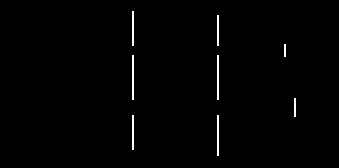

In [48]:
import cv2
import numpy as np
o = cv2.imread("sample/sobel.png", cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(o,-1,1,0)

from PIL import Image
sobelx = Image.fromarray(sobelx)
sobelx

取得影像水平方向的完整邊緣資訊。

    參數ddepth = cv2.CV_64F
    使用cv2.convertScaleAbs()對cv2.Sobel()取絕對值

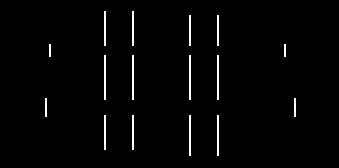

In [49]:
import cv2
import numpy as np
o = cv2.imread("sample/sobel.png", cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(o, cv2.CV_64F, 1, 0)
sobelx = cv2.convertScaleAbs(sobelx)

from PIL import Image
sobelx = Image.fromarray(sobelx)
sobelx

取得影像垂直方向的邊緣資訊 ddepth=-1, dx=0, dy=1

    參數ddepth = cv2.CV_64F
    使用cv2.convertScaleAbs()對cv2.Sobel()取絕對值

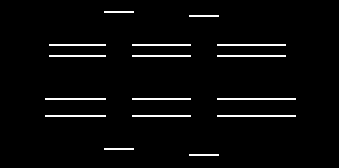

In [50]:
import cv2
import numpy as np
o = cv2.imread("sample/sobel.png", cv2.IMREAD_GRAYSCALE)
sobely = cv2.Sobel(o, cv2.CV_64F, 0, 1)
sobely = cv2.convertScaleAbs(sobely)

from PIL import Image
sobely = Image.fromarray(sobely)
sobely

取得影像垂直方向的邊緣資訊 ddepth=cv2.CV_64F, dx=1, dy=1

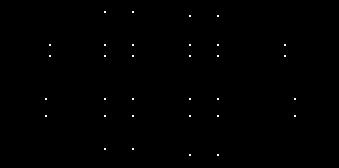

In [51]:
import cv2
import numpy as np
o = cv2.imread("sample/sobel.png", cv2.IMREAD_GRAYSCALE)
sobelxy = cv2.Sobel(o, cv2.CV_64F, 1, 1)
sobelxy = cv2.convertScaleAbs(sobelxy)

from PIL import Image
sobelxy = Image.fromarray(sobelxy)
sobelxy

將cv2.Sobel() x、y方向的邊緣資訊相加

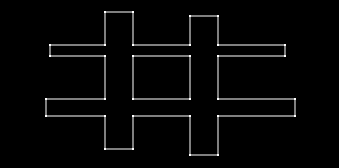

In [59]:
import cv2
o = cv2.imread("sample/sobel.png", cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(o, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(o, cv2.CV_64F, 0, 1)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

from PIL import Image
sobelxy = Image.fromarray(sobelxy)
sobelxy

In [1]:
import cv2
o = cv2.imread("sample/lena.tiff", cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(o, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(o, cv2.CV_64F, 0, 1)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
sobelxy11 = cv2.Sobel(o, cv2.CV_64F,1,1)
sobelxy11 = cv2.convertScaleAbs(sobelxy11)

cv2.imshow("original", o)
cv2.imshow("sobelxy", sobelxy)
cv2.imshow("sobelxy11", sobelxy11)
cv2.waitKey()
cv2.destroyAllWindows()

### Scharr 運算元及函數使用
在離散空間上，有很多方法可以用來計算近似導數。

在Sobel 3x3運算元時，可能結果並不太精準。因此有了Scharr，此方法跟Sobel有同的樣速度，但精度更高。

Scharr是Sobel的改進(基本上，使用方式一樣)。

dst = cv2.Scharr(src, ddrpth, dx, dy[, scale[, delta[, borderType]]])
    
    ddepth:影像深度
    dx:x方向上的導數函數
    dy:y方向上的導數函數
    scale:計算導數的縮放因數
    delta:加到靶心圖上的亮度值。預設為0。

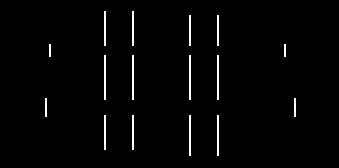

In [2]:
import cv2
import numpy as np
o = cv2.imread("sample/sobel.png", cv2.IMREAD_GRAYSCALE)
scharrx = cv2.Scharr(o, cv2.CV_64F, 1, 0)
scharrx = cv2.convertScaleAbs(scharrx)

from PIL import Image
scharrx = Image.fromarray(scharrx)
scharrx

In [5]:
import cv2
o = cv2.imread("sample/sobel.png", cv2.IMREAD_GRAYSCALE)
scharrx = cv2.Scharr(o, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(o, cv2.CV_64F, 0, 1)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx, 0.5, scharry, 0.5, 0)

cv2.imshow("original", o)
cv2.imshow("scharrxy", scharrxy)
cv2.waitKey()
cv2.destroyAllWindows()

### Sobel和Scharr 比較

In [6]:
o = cv2.imread("sample/lena.tiff", cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(o, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(o, cv2.CV_64F, 0, 1)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

scharrx = cv2.Scharr(o, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(o, cv2.CV_64F, 0, 1)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx, 0.5, scharry, 0.5, 0)

cv2.imshow("original", o)
cv2.imshow("sobelxy", sobelxy)
cv2.imshow("scharrxy", scharrxy)
cv2.waitKey()
cv2.destroyAllWindows()

## Laplace

dst = cv2.Laplacian(src, ddepth[, ksize[, scale[, delta[, borderType]]]])

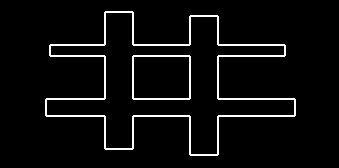

In [8]:
import cv2
import numpy as np
o = cv2.imread("sample/sobel.png", cv2.IMREAD_GRAYSCALE)
laplace = cv2.Laplacian(o, cv2.CV_64F)
laplace = cv2.convertScaleAbs(laplace)

from PIL import Image
laplace = Image.fromarray(laplace)
laplace

# Canny邊緣檢測
是一種使用多級邊緣檢測演算法 檢測邊緣的方法。

## 大致原理
Canny邊緣檢測大致步驟:
1. 去噪。
2. 計算梯度的幅度與方向。atan2
3. 非極大值抑制，即適當地讓邊緣「變瘦」。
4. 確定邊緣。過程中將所有邊緣根據 minValue、maxValue來分類邊緣(強邊緣、保留、虛邊緣)，最後保留的邊緣在由是有連接來判斷是否為強邊緣。

edges = cv2.Canny(inage, threshold1, threshold2[, apertureSize[, L2gradient]])

    edges:邊緣影像
    image:8位元輸入影像
    apertureSize:Sobel運算元孔徑大小。
    L2gradinet:為計算梯度幅度(graient magnitude)的標籤。其預設值為False(L1範數)。
        False:L2較精確，兩個方向的導數的平方在開方。
        True:L1，直接將兩個方向的導數的絕對值相加。

In [10]:
# 不同參數設定的邊緣檢測結果
import cv2
o = cv2.imread("sample/lena.tiff", cv2.IMREAD_GRAYSCALE)
r1 = cv2.Canny(o, 128, 200)
r2 = cv2.Canny(o,  32, 128)
cv2.imshow("original", o)
cv2.imshow("r1",r1)
cv2.imshow("r2",r2)
cv2.waitKey()
cv2.destroyAllWindows()

# 影像金字塔 Gaussian Pyramid
由一幅影像的多個不同解析度的子圖所組成的影像集合。

金字塔底部是高解析度影像(原始影像)，頂部為低解析度的近似影像。像頂部移動，影像的尺寸和解析度都不斷降低。大部分情況下，每向上移動一級，影像的寬、高都降為原來的二分之一。

原圖(0層) -> 高斯濾波 -> 向下採樣(1層) -> 高斯濾波 -> 向下採樣(2層) ...

優點：能夠同時留著 低解析的特徵、高解析特徵，也就是會將所以特徵留著。

## pyrDown
dst = cv2.pyrDown(src[, dstsize[, borderType]])

    dstsize:靶心圖表面大小
    borderType:邊界類型。預設為BORDER_DEFAULT

In [12]:
import cv2
o = cv2.imread("sample/lena.tiff", cv2.IMREAD_GRAYSCALE)
r1 = cv2.pyrDown(o)
r2 = cv2.pyrDown(r1)
r3 = cv2.pyrDown(r2)
print("o.shape", o.shape)
print("r1.shape", r1.shape)
print("r2.shape", r2.shape)
print("r3.shape", r3.shape)
cv2.imshow("original", o)
cv2.imshow("r1", r1)
cv2.imshow("r2", r2)
cv2.imshow("r3", r3)
cv2.waitKey()
cv2.destroyAllWindows()

o.shape (512, 512)
r1.shape (256, 256)
r2.shape (128, 128)
r3.shape (64, 64)


## pyrUp
dst = cv2.pyrUp(src[, dstsize[, borderType]])

In [25]:
import cv2
o = cv2.imread("sample/pyrUp.png", cv2.IMREAD_GRAYSCALE)
r1 = cv2.pyrUp(o)
r2 = cv2.pyrUp(r1)
r3 = cv2.pyrUp(r2)
print("o.shape", o.shape)
print("r1.shape", r1.shape)
print("r2.shape", r2.shape)
print("r3.shape", r3.shape)
cv2.imshow("original", o)
cv2.imshow("r1", r1)
cv2.imshow("r2", r2)
cv2.imshow("r3", r3)
cv2.waitKey()
cv2.destroyAllWindows()

o.shape (66, 68)
r1.shape (132, 136)
r2.shape (264, 272)
r3.shape (528, 544)


## Laplace金字塔  Laplace Pyramid

In [28]:
import cv2
o = cv2.imread("sample/lena.tiff")
# =====高斯向下採樣=====
G0 = o
G1 = cv2.pyrDown(G0)
G2 = cv2.pyrDown(G1)
G3 = cv2.pyrDown(G2)
# =====LaPlace
L0 = G0 - cv2.pyrUp(G1)
L1 = G1 - cv2.pyrUp(G2)
L2 = G2 - cv2.pyrUp(G3)

print("L0.shape", L0.shape)
print("L1.shape", L1.shape)
print("L2.shape", L2.shape)

cv2.imshow("L0", L0)
cv2.imshow("L1", L1)
cv2.imshow("L2", L2)
cv2.waitKey()
cv2.destroyAllWindows()

L0.shape (512, 512, 3)
L1.shape (256, 256, 3)
L2.shape (128, 128, 3)


In [29]:
GL = L0 + cv2.pyrUp(G1)
G0 = G0 - cv2.pyrUp(G1)
cv2.imshow("L2", GL)
cv2.imshow("G0", G0)
cv2.waitKey()
cv2.destroyAllWindows()

使用 高斯金字塔、Laplace金字塔 來恢復 高斯金字塔 內的多層影像

In [31]:
import cv2
import numpy as np
o = cv2.imread("sample/lena.tiff")
# =====產生高斯金字塔=====
G0 = o
G1 = cv2.pyrDown(G0)
G2 = cv2.pyrDown(G1)
G3 = cv2.pyrDown(G2)
# =====Laplace金字塔=====
L0 = G0 - cv2.pyrUp(G1)
L1 = G1 - cv2.pyrUp(G2)
L2 = G2 - cv2.pyrUp(G3)
# =====復原G0=====
RG0 = L0 + cv2.pyrUp(G1) #透過Laplace影像還原影像G0
print("G0.shape", G0.shape)
print("RG0.shape", RG0.shape)
result = RG0 - G0 #將 RG0和 G0相減，來確定 還原影像 是否和 原始影像 一樣。
#計算result的絕對值，避免正負相減。
result = abs(result)
# 計算result所有元素的和
print("原始影像G0與恢復影像RG0差值的絕對值和：",np.sum(result))

G0.shape (512, 512, 3)
RG0.shape (512, 512, 3)
原始影像G0與恢復影像RG0差值的絕對值和： 0


# 影像輪廓
邊緣檢測：邊緣不連續。

影像輪廓：將邊緣連續起來形成的整體。

## 尋找輪廓 cv2.findContours()
image, contours, hierarchy = cv2.findContours(image, mode, method)

    image    :與函數參數中的原始影像image一致。在OpenCV 4.X中，這個參數已被取消，變成contours, hierarchy = cv2.findContours(image, mode, method)
    contours :傳回的輪廓。
        (1)type屬性:
            type(contours)    >>> <class 'list'>
            type(contours[0]) >>> <class 'numpy.ndarray'>
        (2)輪廓的個數:len(contours)
        (3)每個輪廓的個數:len(contours[0])；contours[0].shape
        (4)輪廓內的點:contours[0]
    hierarchy:影像的輪廓層次。[Next, Previous, First_Child, Parent]
        Next:後一個輪廓的索引編號
        Previous:前一個輪廓的索引編號
        First_Child:第1個子輪廓的索引編號
        Parent:父輪廓的索引編號
    
    參數中的
    image :原始影像。8bit單通道影像。所有非0值被處理為1，0保持不變，也就是灰階圖被處理為二值影像。一般都是先處理成二值影像後再帶入函數使用。
    mode  :輪廓搜索模式。
        cv2.RETR_EXTERNAL:只檢測外輪廓
        cv2.RETR_LIST    :對檢測到的輪廓不建立等級關係
        cv2.RETR_CCOMP   :檢索所有輪廓並將他們組織成兩級層次結構。
        cv2.RETR_TREE:建立一個等級樹結構的輪廓。
    method:輪廓的近似方法。
        cv2.CHAIN_APPROX_SIMPLE:儲存所有的輪廓點，相鄰兩個點的像素位置差不超過1，即max(abs(x1-x2))，abs(y2-y1)=1
        cv2.CHAIN_APPROX_SIMPLE:壓縮水平方向、垂直方向、對角線方向的元素，只保留該方向的終點目標。EX:在極端情況下，一個舉行只需用4個點來儲存輪廓資訊。
        cv2.CHAIN_APPROX_TC89_L1:使用teh-Chinl chain近似演算法的一種風格。
        cv2.CHAIN_APPROX_TC89_KCOS:使用teh-Chinl chain近似演算法的一種風格。

## 繪製影像輪廓 cv2.drawContours()
image = cv2.drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]])

    image:要繪製的影像。繪製後，image會變成包含輪廓的影像。
    contours:需要繪製的輪廓，類型是list。
    contourIdx:需要繪製的邊緣索引。告訴opencv要繪製一條還是全部輪廓。整數或0表示繪製該索引的輪廓。預設為-1，表示全部輪廓。
    color:繪製的顏色
    thickness:可選參數。線條粗細。預設為-1，表示實心輪廓。
    lineType:可選參數。表示繪製輪廓時所用的線型。
    hierarchy:對應cv2.findContours()所輸出的層次資訊。
    maxLevel:控制所繪製的輪廓層次的深度。如果該值為0，表示僅繪製第0層的輪廓，如果為其他非0正數，表示繪製最高層和以下的相同數量層級的輪廓。
    offset:偏移參數。

In [2]:
import cv2
o = cv2.imread("sample/contours.png")

cv2.imshow("original", o)
gray = cv2.cvtColor(o, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
o = cv2.drawContours(o, contours, -1, (0,0,255), 10) # 紅色，粗細為5

cv2.imshow("result", o)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
import cv2
import numpy as np
o = cv2.imread("sample/lena.tiff")
cv2.imshow("original", o)
gray = cv2.cvtColor(o, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
o = cv2.drawContours(o, contours, -1, (0,0,255), 1) # 紅色，粗細為5

mask = np.zeros(o.shape, np.uint8)
mask = cv2.drawContours(mask, contours, -1, (255,255,255), -1)
cv2.imshow("mask", mask)
location = cv2.bitwise_and(o, mask)
cv2.imshow("location", location)
cv2.waitKey()
cv2.destroyAllWindows()

## 矩特徵
